# Still Passing the Buck
## An Economic Performance comparison between Argentine Government Administrations

## Objective
The Objective of this work is to perform a comparative analysis of the Economic Performance of different Argentine Government Administrations for the last 60 years.

The analysis will be performed mainly using using data provided by the World Bank ["*World Developmnent Indicators*"<sup>[13]</sup>](#worldbank) dataset. It also will complement it with interest rate data not available in it.

## Methodology
The comparison between the administrations will be done using the **Classical Macroeconomic Performance Index (CMPI)**, as defined in the paper ["*Passing the buck: Monetary and fiscal policies*"<sup>[4]</sup>](#paolera2011passing). This research is also available in the book: ["*A New Economic History of Argentina*"<sup>[6]</sup>](#paolera2011econhist).

It's important to mention that in that study, the autors use two indexes to compare the administrative terms, the **CMPI** and the **Fiscal Pressure Index (FPI)**. This work will only use the **CMPI**, leaving the **FPI** outside the current scope.

This current work will be limited to the years 1964 to 2019 due to the data availability in the World Bank indicators.

## The Classical Macroeconomic Performance Index (CMPI)
The Index aggregates the results of four classic economic variables:
* Inflation
* Devaluation
* Interest Rate
* Per Capita changes in Economic Activity

The rational of the index is to rank the improvements that occurred during a particular administration in relation with the status of the last year of the previous administration. This index is more a **comparative index of improvements** than an absolute position index.

### Inflation
The inflation rate is usually linked to the government’s high-powered money policy and the expectations of agents about its future rate of expansion [(Sargent 1986)<sup>[12]</sup>](#sargent1986). It sheds light on the results of one of the sources of revenue that Argentine governments have repeatedly used: the Inflationary Tax ([Fiore 2000<sup>[3]</sup>](#fiore2000), [Ennis 2007<sup>[8]</sup>](#ennis2007), [Wijewardena 2007<sup>[11]</sup>](#wijewardena2007)) or Seigniorage ([Amaral 1988<sup>[1]</sup>](#amaral1988), [Irigoin 2000a<sup>[10]</sup>](#irigoin2000a), [Gerardo della Paolera and Taylor 2001<sup>[7]</sup>](#paolera2001))

### Devalutation
The devaluation rate is another way of measuring changes in nominal values in the economy. In particular it is a very important indicator of the willingness of a government to stabilize the external value of the domestic currency. Devaluation is often associated with balance of payments crises [(Eichengreen, Rose, and Wyplosz 1996)<sup>[2]</sup>](#eichengreen1996) and fiscal crises [(Gerardo della Paolera 1994)<sup>[5]</sup>](#paolera1994). It also plays a part in recurrent episodes of political instability [(Irigoin and Salazar 2000)<sup>[9]</sup>](#irigoion2000).

### Interest Rate
The real interest rate on hard currency is a proxy for country risk fluctuations and tightness in the credit market. In a country with long periods of financial repression and credit rationing, the interest rate in the domestic credit market is not a useful measure of credit-market tightness. Thus, an estimate of the costs of borrowing in international credit markets seems a better alternative.

### Change in Economic Activity
The growth rate on economic activity indicates the influence of the incumbent administration on the changing pace of economic development.


## Calculating the CMPI
We load the World Development Indicatos dataset and filter the data for Argentina.

In [152]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

country_name = 'Argentina'

df = pd.read_csv(
    'https://github.com/jahnog/still-passing-the-buck/raw/master/Indicators.csv.gz', compression='gzip')
arg_data = df[df['CountryName'] == country_name]

arg_data.tail()


,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
218718,Argentina,ARG,Women's share of population ages 15+ living wi...,SH.DYN.AIDS.FE.ZS,2015,32.1
218719,Argentina,ARG,Women's share of population ages 15+ living wi...,SH.DYN.AIDS.FE.ZS,2016,32.2
218720,Argentina,ARG,Women's share of population ages 15+ living wi...,SH.DYN.AIDS.FE.ZS,2017,32.2
218721,Argentina,ARG,Women's share of population ages 15+ living wi...,SH.DYN.AIDS.FE.ZS,2018,32.3
218722,Argentina,ARG,Women who believe a husband is justified in be...,SG.VAW.REAS.ZS,2012,2.0


### Inflation
The Inflation for a year is measured as the relation between the price level of that year and the price level of the previous year. 

For this work, we will consider Inflation as the simple average between the Consumer Inflation (calculated from the Consumer Price Index) and the Wholesale Inflation (calculated from the Wholesale price Index).

#### Consumer Price Inflation
We filter the Consumer price level data, and calculate the inflation for each year.

In [153]:
arg_cpi = arg_data[arg_data['IndicatorCode'] == 'FP.CPI.TOTL'][[
    'Year', 'IndicatorName', 'Value']].set_index('Year').rename(columns={'Value': 'CPIPL'})
arg_cpi['CPI'] = arg_cpi['CPIPL'].pct_change()*100
arg_cpi.tail()


,IndicatorName,CPIPL,CPI
Year,,,
2015,Consumer price index (2010 = 100),336.340985,26.924874
2016,Consumer price index (2010 = 100),474.408297,41.049803
2017,Consumer price index (2010 = 100),592.040681,24.795600
2018,Consumer price index (2010 = 100),874.121957,47.645590
2019,Consumer price index (2010 = 100),1344.682803,53.832402


**Considerations:** Except for the years betwwen 1993 and 2001, Argentina suffered from High or Growing Inflation, with a máximum record of 4923% annual CPI inflation in the year 1989. Due to the Economic Crisis, that year the presidency elections were brought forward and the president at that time, Dr. Raul Alfonsín, left his term 5 months earlier.

Showing all the CPI inflation data with such extreme values does not allow us to examine the inflation behavior for the rest of the years, except a few ones with extremely high inflation. 

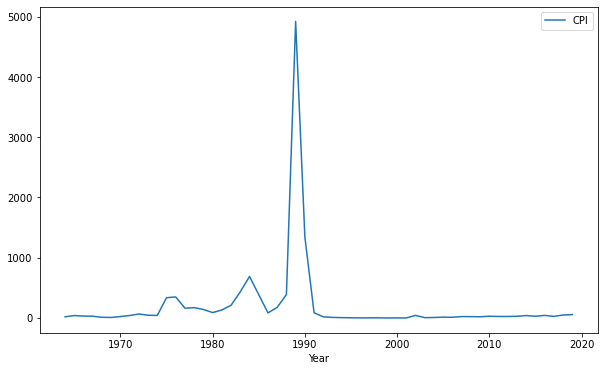

In [154]:
plot = arg_cpi[arg_cpi.index >= 1964].plot(figsize=(10, 6), y='CPI')


Reducing the maximum displayed inflation values is necessary to visually analyze the inflation behavior specially in the last years.

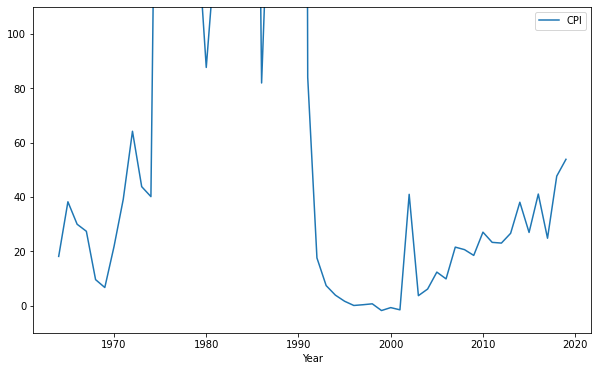

In [155]:
plot = arg_cpi[arg_cpi.index >= 1964].plot(
    figsize=(10, 6), y='CPI', ylim=(-10, 110))


#### Wholesale Price Inflation
We filter the Wholesale price level data, and calculate the inflation for each year.

In [156]:
arg_wpi = arg_data[arg_data['IndicatorCode'] == 'FP.WPI.TOTL'][[
    'Year', 'IndicatorName', 'Value']].set_index('Year').rename(columns={'Value': 'WPIPL'})
arg_wpi['WPI'] = arg_wpi['WPIPL'].pct_change()*100
arg_wpi.tail()


,IndicatorName,WPIPL,WPI
Year,,,
2015,Wholesale price index (2010 = 100),214.383485,14.257539
2016,Wholesale price index (2010 = 100),288.407941,34.528991
2017,Wholesale price index (2010 = 100),342.768565,18.848519
2018,Wholesale price index (2010 = 100),594.698401,73.498524
2019,Wholesale price index (2010 = 100),942.551251,58.492313


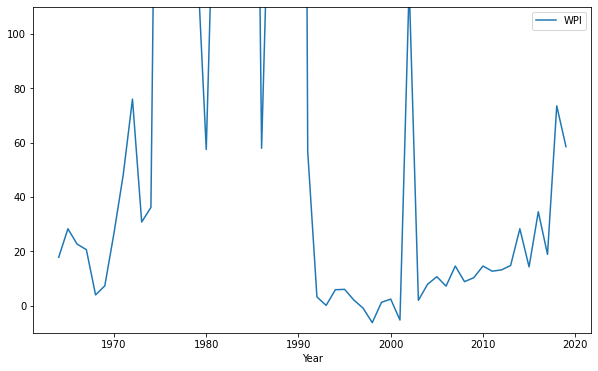

In [157]:
plot = arg_wpi[arg_wpi.index >= 1964].plot(
    figsize=(10, 6), y='WPI', ylim=(-10, 110))


#### Inflation
We use the simple average between the CPI and the WPI as our inflation measure.

In [158]:
arg_inflation = arg_cpi.join(arg_wpi['WPI'], how='outer')
arg_inflation['InflationAvg'] = (
    arg_inflation['CPI'] + arg_inflation['WPI']) / 2
arg_inflation.tail()


,IndicatorName,CPIPL,CPI,WPI,InflationAvg
Year,,,,,
2015,Consumer price index (2010 = 100),336.340985,26.924874,14.257539,20.591206
2016,Consumer price index (2010 = 100),474.408297,41.049803,34.528991,37.789397
2017,Consumer price index (2010 = 100),592.040681,24.795600,18.848519,21.822059
2018,Consumer price index (2010 = 100),874.121957,47.645590,73.498524,60.572057
2019,Consumer price index (2010 = 100),1344.682803,53.832402,58.492313,56.162358


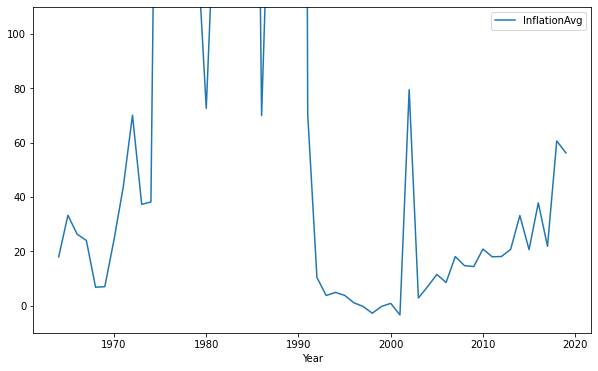

In [159]:
plot = arg_inflation[arg_inflation.index >= 1964].plot(
    figsize=(10, 6), y='InflationAvg', ylim=(-10, 110))


Given the high inflation periods, the authores of the paper "Passing the buck" decided to use the natural logarithm of the price level variation instead of the raw inflation number to construct the CMPI.

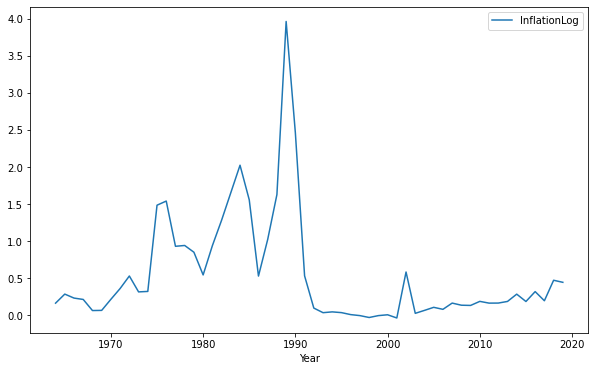

In [160]:
arg_inflation['InflationLog'] = np.log(1 + arg_inflation['InflationAvg'] / 100)
plot = arg_inflation[arg_inflation.index >= 1964].plot(
    figsize=(10, 6), y='InflationLog')


### Devaluation
We filter the Exchange Rate between the local currency and the US Dollar. It is worth noting that, in the studied timeframe, Argentina has changed 6 times the denomination of it's local currencies. Those changes where the result of prolonged periods of high inflation. The Exchange Rate dataset already takes these changes into account.

In [161]:
arg_deval = arg_data[arg_data['IndicatorCode'] == 'PA.NUS.ATLS'][[
    'Year', 'Value']].set_index('Year').rename(columns={'Value': 'USDARS'})
arg_deval['Devaluation'] = arg_deval.pct_change() * 100


Similarly to the Inflation, we also use the natural logarithm of the Devaluation rate to construct the CMPI, instead of the raw Devaluation value.

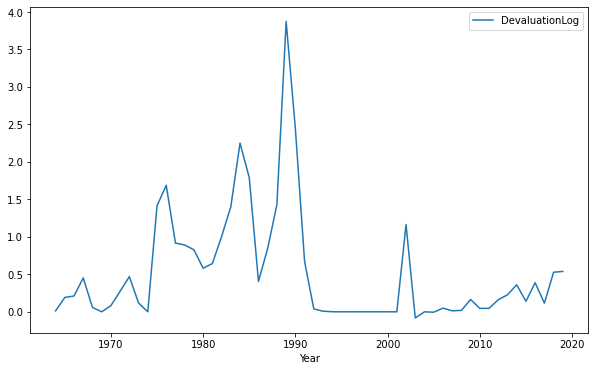

In [162]:
arg_deval['DevaluationLog'] = np.log(1 + arg_deval['Devaluation'] / 100)
plot = arg_deval[arg_deval.index >= 1964].plot(
    figsize=(10, 6), y='DevaluationLog')


### Interest Rate
The Interest Rate used in the CMPI is not available in the World Development Indicators dataset. To be able to calculate the Index we get the Interest Rate from other sources: for the years up to 1988, we use the values from the "Passing the Buck" paper. From the year 1989 and on, we use the average Argentina EMBI+ value (commonly known as country risk) for each year.

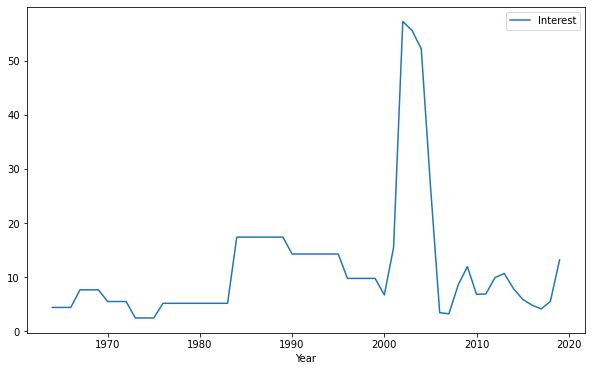

In [163]:
arg_interest = pd.read_csv(
    'https://github.com/jahnog/still-passing-the-buck/raw/master/data/argentina/interest/wb-ids-arg.csv')
arg_interest = arg_interest[arg_interest['CountryName'] == country_name]
arg_interest = arg_interest[['Year', 'Interest']].set_index('Year')
plot = arg_interest[arg_interest.index >= 1964].plot(figsize=(10, 6))


### Growth
We filter the annual growth rate from the Indicators dataset.

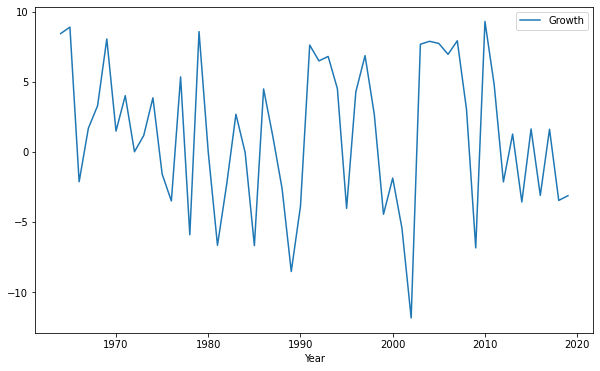

In [164]:
arg_growth = arg_data[arg_data['IndicatorCode'] == 'NY.GDP.PCAP.KD.ZG'][[
    'Year', 'Value']].set_index('Year').rename(columns={'Value': 'Growth'})
plot = arg_growth[arg_growth.index >= 1964].plot(figsize=(10, 6))


### Grouping data by Administration
The yearly data is grouped using the name of the president that had the longest period in exercise for that year.

**Considerations:** In the years 1966, 1970, 1973, 1984 and 2003 the administrations changed in the middle of the year instead of at year end. For those years, we use the averages of the end of year results from that year an the previous one.

In [165]:
presidency_terms = [
    # October 12,  1963 - June 28,     1966 - Ousted
    ('Illia', 1964, 1966),
    # June 29,     1966 - June 8,      1970 - Military Coup
    ('Ongania', 1967, 1969),
    # June 8,      1970 - May 25,      1973 - Military Coup
    ('Levingston/Lanusse', 1970, 1972),
    # May 25,      1973 - July 13,     1973 - Hector Cámpora       - Perón's political right arm - Renounces
    ('Peron III', 1973, 1975),
    # July 13,     1973 - October 12,  1973 - Raul Lastrini        - President of the Chamber of Deputies
    # October 12,  1973 - July 1,      1974 - Juan Domingo Perón   - Passed Away
    # July 1,      1974 - March 29,    1973 - M. E. M. de Perón    - Vice President and First Lady - Ousted
    # March 29,    1976 - December 10, 1983 - Military Coup
    ('Videla/Viola/Galtieri/Bignone', 1976, 1983),
    # December 10, 1983 - July 8,      1989 - Renounces            - Hyperinflation
    ('Alfonsin', 1984, 1989),
    # July 8,      1989 - December 10, 1995
    ('Menem', 1990, 1995),
    # December 10, 1995 - December 10, 1999
    ('Menem II', 1996, 1999),
    # December 10, 1999 - December 20, 2001 - Renounces            - Debt Crisis and Bank Run
    ('De la Rua', 2000, 2001),
    # December 21, 2001 - December 22, 2001 - Ramon Puerta         - President of the Senate
    # December 22, 2001 - December 31, 2001 - Adolfo Rodríguez Saá - Designated Interim President - Renounces
    # December 30, 2001 - January 1,   2001 - Eduardo Camaño       - President of the Chamber of Deputies
    # January 2,   2002 - May 25,      2003 - Designated Interim President
    ('Duhalde', 2002, 2002),
    # May 25,      2003 - December 10, 2007
    ('N.Kirchner', 2003, 2007),
    # December 10, 2007 - December 10, 2011
    ('C.Kirchner', 2008, 2011),
    # December 10, 2011 - December 10, 2015
    ('C.Kirchner II', 2012, 2015),
    # December 10, 2015 - December 10, 2019
    ('Macri', 2016, 2019)
]


In [166]:
def composite_rate(start_level: float, end_level: float,  years: int, periods_year: int) -> float:
    return periods_year * (pow((end_level / start_level), 1 / (periods_year * years)) - 1)


def term_concurrent(term: str, first_year: int, last_year: int) -> pd.DataFrame:

    df = pd.DataFrame()

    df.loc[0, 'YearFrom'] = first_year
    df.loc[0, 'YearTo'] = last_year
    df.loc[0, 'Term'] = term

    years = last_year - first_year + 1
    periods_year = 12

    # Inflation Annual Rate
    price_level = 100
    for year in range(first_year, last_year + 1):
        price_level = price_level + price_level * \
            arg_inflation['InflationAvg'][year] / 100

    inf_rate = composite_rate(100, price_level, years, periods_year)
    df.loc[0, 'InflationAvg'] = inf_rate * 100

    # Devaluation Annual Rate
    start_level = arg_deval['USDARS'][first_year - 1]
    end_level = arg_deval['USDARS'][last_year]

    deval_rate = composite_rate(start_level, end_level, years, periods_year)
    df.loc[0, 'Devaluation'] = deval_rate * 100

    # Interest on Hard Currency Annual Rate
    interest = 0
    for year in range(first_year, last_year + 1):
        interest = interest + arg_interest['Interest'][year]

    df.loc[0, 'Interest'] = interest / years

    # Growth Annual Rate
    gpc = 100
    for year in range(first_year, last_year + 1):
        gpc = gpc + gpc * arg_growth['Growth'][year] / 100

    growth_rate = composite_rate(100, gpc, years, 1)
    df.loc[0, 'Growth'] = growth_rate * 100

    # Set Dataframe Index
    df.set_index('Term', inplace=True)

    return df


In [167]:
terms = pd.DataFrame()

for president, first_year, last_year in presidency_terms:
    terms = terms.append(term_concurrent(president, first_year, last_year))


### Economic variables by Administration

In [168]:
terms


,YearFrom,YearTo,InflationAvg,Devaluation,Interest,Growth
Term,,,,,,
Illia,1964.0,1966.0,23.058945,13.901574,4.390000,4.939286
Ongania,1967.0,1969.0,11.645398,17.148900,7.640000,4.303789
Levingston/Lanusse,1970.0,1972.0,37.591126,27.874776,5.480000,1.817561
Peron III,1973.0,1975.0,72.960513,52.150618,2.440000,1.115896
Videla/Viola/Galtieri/Bignone,1976.0,1983.0,113.642011,103.655297,5.150000,-0.355901
Alfonsin,1984.0,1989.0,192.760688,190.364738,17.380000,-2.152782
Menem,1990.0,1995.0,54.766387,53.878846,14.260000,2.796009
Menem II,1996.0,1999.0,-0.595435,0.000000,9.750000,2.253349
De la Rua,2000.0,2001.0,-1.325364,0.000000,11.079041,-3.677560


### Calculating Annual period comparison Data

In [169]:
def year_values(year: int) -> pd.DataFrame():

    df = pd.DataFrame()

    df.loc[year, 'Inflation'] = arg_inflation['InflationLog'][year]
    df.loc[year, 'Devaluation'] = arg_deval['DevaluationLog'][year]
    df.loc[year, 'Interest'] = arg_interest['Interest'][year] / 100
    df.loc[year, 'Growth'] = arg_growth['Growth'][year] / 100

    return df


def comparison_dataframe() -> pd.DataFrame:
    all_years = pd.DataFrame()

    for year in range(1963, 2020):
        all_years = all_years.append(year_values(year))

    return all_years


In [170]:
year_compare = comparison_dataframe()
year_compare


,Inflation,Devaluation,Interest,Growth
1963,0.213677,0.464597,0.028900,-0.067882
1964,0.164974,0.011967,0.043900,0.084372
1965,0.286924,0.191374,0.043900,0.088968
1966,0.233308,0.211309,0.043900,-0.021365
1967,0.214876,0.451985,0.076400,0.016785
1968,0.065339,0.058841,0.076400,0.032869
1969,0.067462,0.000000,0.076400,0.080503
1970,0.217153,0.082238,0.054800,0.014795
1971,0.362267,0.274437,0.054800,0.040075
1972,0.531011,0.470004,0.054800,0.000058


In [171]:
def term_comparison(term: str, first_year: int, last_year: int) -> pd.DataFrame:

    prev_year = year_values(first_year - 1)

    all_years = pd.DataFrame()

    for year in range(first_year, last_year + 1):
        year_val = year_values(year)

        df = pd.DataFrame()
        df.loc[year, 'YearFrom'] = first_year
        df.loc[year, 'YearTo'] = last_year
        df.loc[year, 'Term'] = term
        df.loc[year, 'Inflation'] = year_val['Inflation'][year] - \
            prev_year['Inflation'][first_year - 1]
        df.loc[year, 'Devaluation'] = year_val['Devaluation'][year] - \
            prev_year['Devaluation'][first_year - 1]
        df.loc[year, 'Interest'] = year_val['Interest'][year] - \
            prev_year['Interest'][first_year - 1]
        df.loc[year, 'Growth'] = year_val['Growth'][year] - \
            prev_year['Growth'][first_year - 1]
        all_years = all_years.append(df)

    return all_years


In [172]:
terms_comp = pd.DataFrame()

for president, first_year, last_year in presidency_terms:
    terms_comp = terms_comp.append(
        term_comparison(president, first_year, last_year))

terms_comp


,YearFrom,YearTo,Term,Inflation,Devaluation,Interest,Growth
1964,1964.0,1966.0,Illia,-0.048703,-0.452630,0.015000,0.152254
1965,1964.0,1966.0,Illia,0.073247,-0.273223,0.015000,0.156849
1966,1964.0,1966.0,Illia,0.019631,-0.253288,0.015000,0.046517
1967,1967.0,1969.0,Ongania,-0.018431,0.240676,0.032500,0.038149
1968,1967.0,1969.0,Ongania,-0.167968,-0.152469,0.032500,0.054234
1969,1967.0,1969.0,Ongania,-0.165846,-0.211309,0.032500,0.101868
1970,1970.0,1972.0,Levingston/Lanusse,0.149691,0.082238,-0.021600,-0.065708
1971,1970.0,1972.0,Levingston/Lanusse,0.294805,0.274437,-0.021600,-0.040428
1972,1970.0,1972.0,Levingston/Lanusse,0.463549,0.470004,-0.021600,-0.080445
1973,1973.0,1975.0,Peron III,-0.214277,-0.352221,-0.030400,0.011511


In [173]:
pos = 0
increment = 1 / terms_comp.size

terms_comp_sorted = terms_comp.sort_values(by='Inflation', ascending=False)
for year_values in terms_comp_sorted.itertuples():
    terms_comp.loc[year_values.Index, 'InflationPos'] = pos
    pos = pos + increment

pos = 0
terms_comp_sorted = terms_comp.sort_values(by='Devaluation', ascending=False)
for year_values in terms_comp_sorted.itertuples():
    terms_comp.loc[year_values.Index, 'DevaluationPos'] = pos
    pos = pos + increment

pos = 0
terms_comp_sorted = terms_comp.sort_values(by='Interest', ascending=False)
for year_values in terms_comp_sorted.itertuples():
    terms_comp.loc[year_values.Index, 'InterestPos'] = pos
    pos = pos + increment

pos = 0
terms_comp_sorted = terms_comp.sort_values(by='Growth', ascending=True)
for year_values in terms_comp_sorted.itertuples():
    terms_comp.loc[year_values.Index, 'GrowthPos'] = pos
    pos = pos + increment

terms_comp


,YearFrom,YearTo,Term,Inflation,Devaluation,Interest,Growth,InflationPos,DevaluationPos,InterestPos,GrowthPos
1964,1964.0,1966.0,Illia,-0.048703,-0.452630,0.015000,0.152254,0.076531,0.091837,0.068878,0.119898
1965,1964.0,1966.0,Illia,0.073247,-0.273223,0.015000,0.156849,0.030612,0.084184,0.066327,0.125000
1966,1964.0,1966.0,Illia,0.019631,-0.253288,0.015000,0.046517,0.043367,0.081633,0.071429,0.091837
1967,1967.0,1969.0,Ongania,-0.018431,0.240676,0.032500,0.038149,0.056122,0.030612,0.035714,0.081633
1968,1967.0,1969.0,Ongania,-0.167968,-0.152469,0.032500,0.054234,0.086735,0.076531,0.038265,0.096939
1969,1967.0,1969.0,Ongania,-0.165846,-0.211309,0.032500,0.101868,0.084184,0.079082,0.040816,0.109694
1970,1970.0,1972.0,Levingston/Lanusse,0.149691,0.082238,-0.021600,-0.065708,0.022959,0.043367,0.089286,0.015306
1971,1970.0,1972.0,Levingston/Lanusse,0.294805,0.274437,-0.021600,-0.040428,0.012755,0.022959,0.091837,0.038265
1972,1970.0,1972.0,Levingston/Lanusse,0.463549,0.470004,-0.021600,-0.080445,0.007653,0.010204,0.094388,0.010204
1973,1973.0,1975.0,Peron III,-0.214277,-0.352221,-0.030400,0.011511,0.094388,0.086735,0.102041,0.068878


In [174]:
def term_scores(term: str, first_year: int, last_year: int) -> pd.DataFrame:

    score = 0
    for year in range(first_year, last_year + 1):

        # if (year == 1966 or year == 1970 or year == 1973 or year == 1984 or year == 2003) and (year == first_year) :
        #     score = score + (terms_comp['InflationPos'][year - 1]   + terms_comp['InflationPos'][year]   ) / 2.0
        #     score = score + (terms_comp['DevaluationPos'][year - 1] + terms_comp['DevaluationPos'][year] ) / 2.0
        #     score = score + (terms_comp['InterestPos'][year - 1]    + terms_comp['InterestPos'][year] )    / 2.0
        #     score = score + (terms_comp['GrowthPos'][year - 1]      + terms_comp['GrowthPos'][year] )      / 2.0
        # elif (year == 1965 or year == 1969 or year == 1972 or year == 1983 or year == 2002) and (year == last_year): 
        #     score = score + (terms_comp['InflationPos'][year]   + terms_comp['InflationPos'][year + 1]   ) / 2.0
        #     score = score + (terms_comp['DevaluationPos'][year] + terms_comp['DevaluationPos'][year + 1] ) / 2.0
        #     score = score + (terms_comp['InterestPos'][year]    + terms_comp['InterestPos'][year + 1] )    / 2.0
        #     score = score + (terms_comp['GrowthPos'][year]      + terms_comp['GrowthPos'][year + 1] )      / 2.0
        # else:
        score = score + terms_comp['InflationPos'][year]
        score = score + terms_comp['DevaluationPos'][year]
        score = score + terms_comp['InterestPos'][year]
        score = score + terms_comp['GrowthPos'][year]

    return score / (last_year - first_year + 1)

terms_score = pd.DataFrame()

for president, first_year, last_year in presidency_terms:
    terms_score.loc[president, 'YearFrom'] = first_year
    terms_score.loc[president, 'YearTo'] = last_year
    terms_score.loc[president, 'Score'] = term_scores(
        president, first_year, last_year)

terms_score.sort_values(by='Score', ascending=False)


,YearFrom,YearTo,Score
Menem,1990.0,1995.0,0.492347
N.Kirchner,2003.0,2007.0,0.484694
Menem II,1996.0,1999.0,0.355230
Illia,1964.0,1966.0,0.317177
Videla/Viola/Galtieri/Bignone,1976.0,1983.0,0.300064
Peron III,1973.0,1975.0,0.293367
Ongania,1967.0,1969.0,0.272109
De la Rua,2000.0,2001.0,0.252551
Macri,2016.0,2019.0,0.164541
C.Kirchner,2008.0,2011.0,0.163903


## References

1. <a name="amaral1988">Amaral, Samuel. 1988. El descubrimiento de la financiación inflacionaria: Buenos Aires, 1790–1830. Investigaciones y Ensayos 37. Buenos Aires: Academia Nacional de Historia.</a>
2. <a name="eichengreen1996">Eichengreen, Barry, Andrew K. Rose, and Charles Wyplosz. 1996. Contagious Currency Crises. Working Paper Series no. 5681 (July), National Bureau of Economic Research.</a>
3. <a name="fiore2000">Fiorella de Fiore, European Central Bank Working Paper, November 2000:</a> ["*The optimal Inflation Tax when Taxes are costly to collect*"](https://www.ecb.europa.eu/pub/pdf/scpwps/ecbwp038.pdf).
4. <a name="paolera2011passing">Gerardo della Paolera, Alejandra Irigoin and Carlos Guillermo Bozzoli, 2011:</a> ["*Passing the buck: Monetary and fiscal policies*"](https://www.researchgate.net/publication/266455336_Passing_the_buck_Monetary_and_fiscal_policies).
5. <a name="paolera1994">Gerardo della Paolera. 1994. Experimentos monetarios y bancarios en Argentina: 1861–1930. Revista de Historia Económica 12 (3): 539–90.</a>
6. <a name="paolera2011econhist">Gerardo della Paolera and Alan M. Taylor. 2011:</a> "*A New Economic History of Argentina*", Cambridge University Press.
7. <a name="paolera2001">Gerardo della Paolera and Alan M. Taylor. 2001. Straining at the Anchor: The Argentine Currency Board and the Search for Macroeconomic Stability, 1880–1935. Chicago: University of Chicago Press.</a>
8. <a name="ennis2007">Huberto M. Ennis, Research Department, Federal Reserve Bank of Richmond, 2007, Working Paper No. 07-06:</a> ["*Avoiding the Inflation Tax*"](https://www.richmondfed.org/-/media/richmondfedorg/publications/research/working_papers/2007/pdf/wp07-6.pdf).
9. <a name="irigoin2000">Irigoin, Maria Alejandra, and E. Salazar. 2000. Linking Political Events and Economic Uncertainty: An Examination of the Volatility in the Buenos Aires Paper Peso Rate of Exchange, 1826–1866. Paper presented to the 2d LACLIO Conference, Stanford University (November).</a>
10. <a name="irigoin2000a">Irigoin, Maria Alejandra. 2000a. Finance, Politics and Economics in Buenos Aires 1820s–1860s: The Political Economy of Currency Stabilisation. Ph.D. dissertation, Department of Economic History, London School of Economics.</a>
11. <a name="wijewardena2007">Mr W. A. Wijewardena, Deputy Governor of the Central Bank of Sri Lanka, published in Sunday Times on 10 June 2007:</a> ["*Why inflation tax is an evil?*"](https://www.bis.org/review/r070613f.pdf).
12. <a name="sargent1986">Sargent, Thomas J. 1986. "*Rational Expectations and Inflation*". New York: Harper &amp; Row.</a>
13. <a name="worldbank">World Bank:</a> ["*World Developmnent Indicators*"](https://databank.worldbank.org/reports.aspx?source=World-Development-Indicators).
